# Titanic Classification

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [56]:
dataset = pd.read_csv('titanic new.csv')

# Display first 20 rows in dataset

In [57]:
dataset.head(20)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


# Display last 30 rows in dataset

In [58]:
dataset.tail(30)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1280,3.0,0.0,"Vovk, Mr. Janko",male,22.0,0.0,0.0,349252,7.8958,NaN,S,NaN,NaN,NaN
1281,3.0,0.0,"Waelens, Mr. Achille",male,22.0,0.0,0.0,345767,9.0000,NaN,S,NaN,NaN,"Antwerp, Belgium / Stanton, OH"
1282,3.0,0.0,"Ware, Mr. Frederick",male,NaN,0.0,0.0,359309,8.0500,NaN,S,NaN,NaN,NaN
1283,3.0,0.0,"Warren, Mr. Charles William",male,NaN,0.0,0.0,C.A. 49867,7.5500,NaN,S,NaN,NaN,NaN
1284,3.0,0.0,"Webber, Mr. James",male,NaN,0.0,0.0,SOTON/OQ 3101316,8.0500,NaN,S,NaN,NaN,NaN
1285,3.0,0.0,"Wenzel, Mr. Linhart",male,32.5,0.0,0.0,345775,9.5000,NaN,S,NaN,298.0,NaN
1286,3.0,1.0,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0.0,0.0,2688,7.2292,NaN,C,C,NaN,NaN
1287,3.0,0.0,"Widegren, Mr. Carl/Charles Peter",male,51.0,0.0,0.0,347064,7.7500,NaN,S,NaN,NaN,NaN
1288,3.0,0.0,"Wiklund, Mr. Jakob Alfred",male,18.0,1.0,0.0,3101267,6.4958,NaN,S,NaN,314.0,NaN
1289,3.0,0.0,"Wiklund, Mr. Karl Johan",male,21.0,1.0,0.0,3101266,6.4958,NaN,S,NaN,NaN,NaN


# FINDING SHAPE OF DATASET

In [59]:
dataset.shape

(1310, 14)

# Information About Our Dataset Like the Total Number of Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [60]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


# Get Overall Statistics About The Dataset

In [61]:
dataset.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


# Check Null Values In The Dataset

In [62]:
dataset.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [63]:
print(dataset.survived.value_counts())
print(f"Number of people that did not survive is {dataset.survived.value_counts()[0]}")
print(f"Number of people that survived is {dataset.survived.value_counts()[1]}")
print(f"Percentage of people that did not survive is {(dataset.survived.value_counts()[0] / dataset.survived.count()) * 100}")
print(f"Percentage of people that survived is {(dataset.survived.value_counts()[1] / dataset.survived.count()) * 100}")

survived
0.0    809
1.0    500
Name: count, dtype: int64
Number of people that did not survive is 809
Number of people that survived is 500
Percentage of people that did not survive is 61.80290297937356
Percentage of people that survived is 38.19709702062643


In [65]:
print(f"Male Survival Count: {len(dataset[(dataset.survived == 1) & (dataset.sex == 'male')])}")
print(f"Female Survival Count: {len(dataset[(dataset.survived == 1) & (dataset.sex == 'female')])}")

Male Survival Count: 161
Female Survival Count: 339


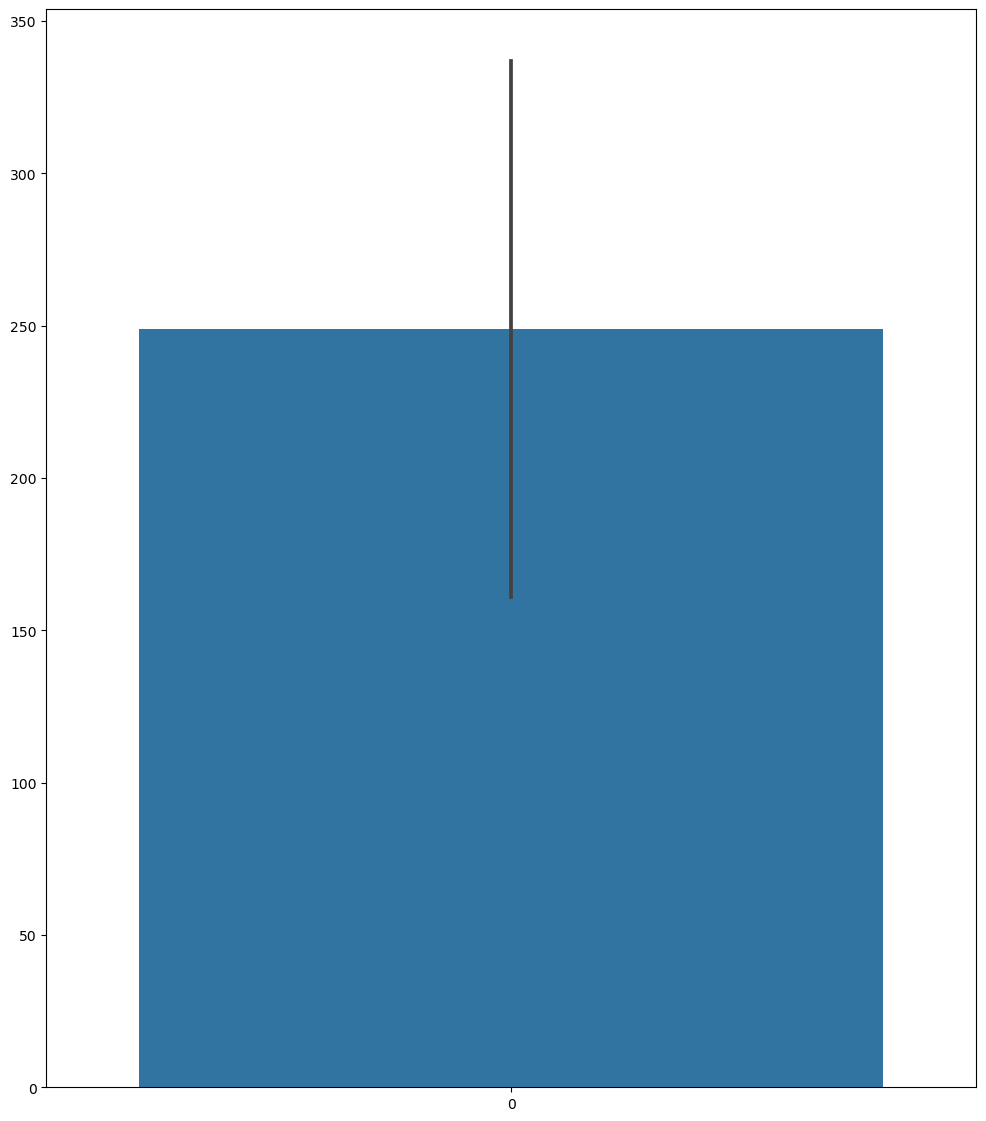

In [133]:
gender_labels = ["Male", "Female"]
gender_survival_counts = [len(dataset[(dataset.survived == 1) & (dataset.sex == 'male')]), len(dataset[(dataset.survived == 1) & (dataset.sex == 'female')])]
plt.figure(figsize=(12, 14))
sns.barplot(gender_survival_counts)
plt.show()


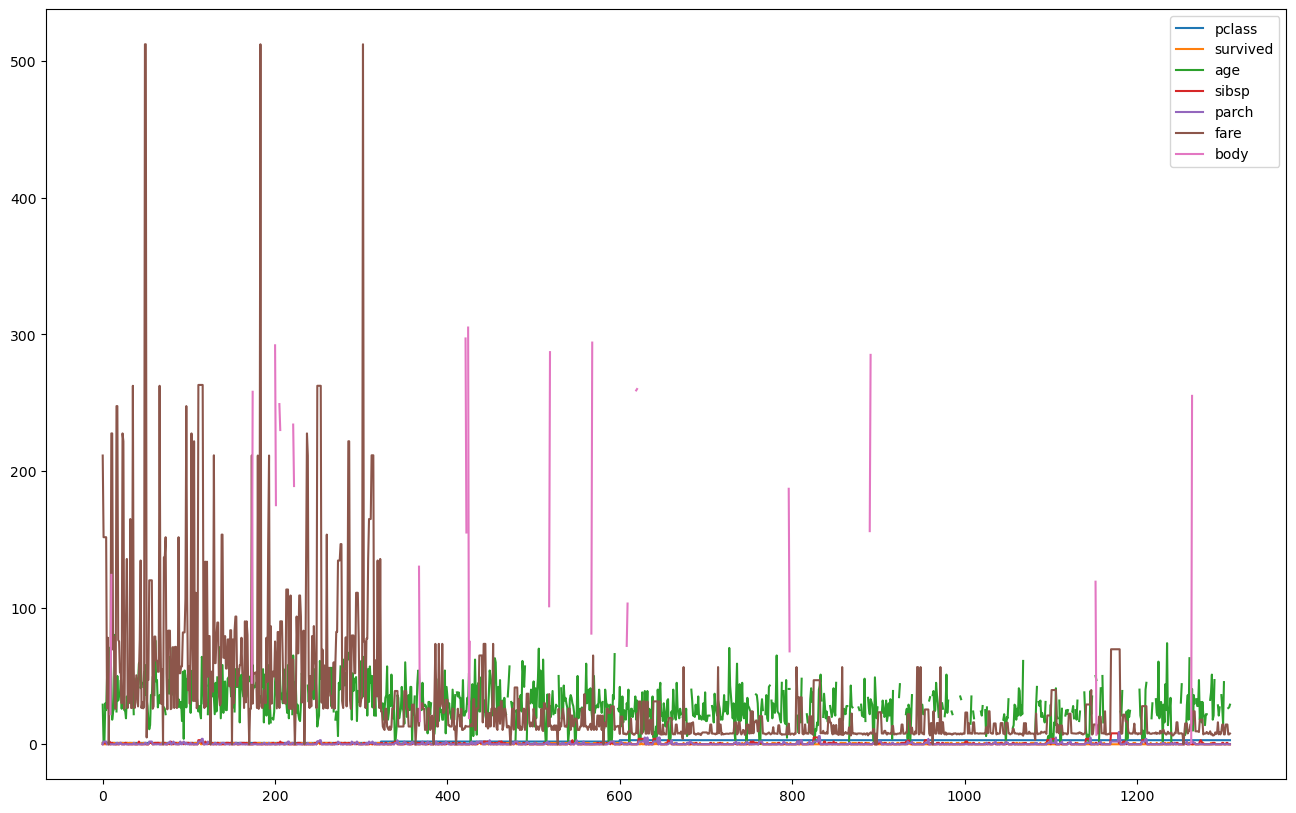

In [67]:
dataset.plot(figsize=(16, 10))
plt.show()

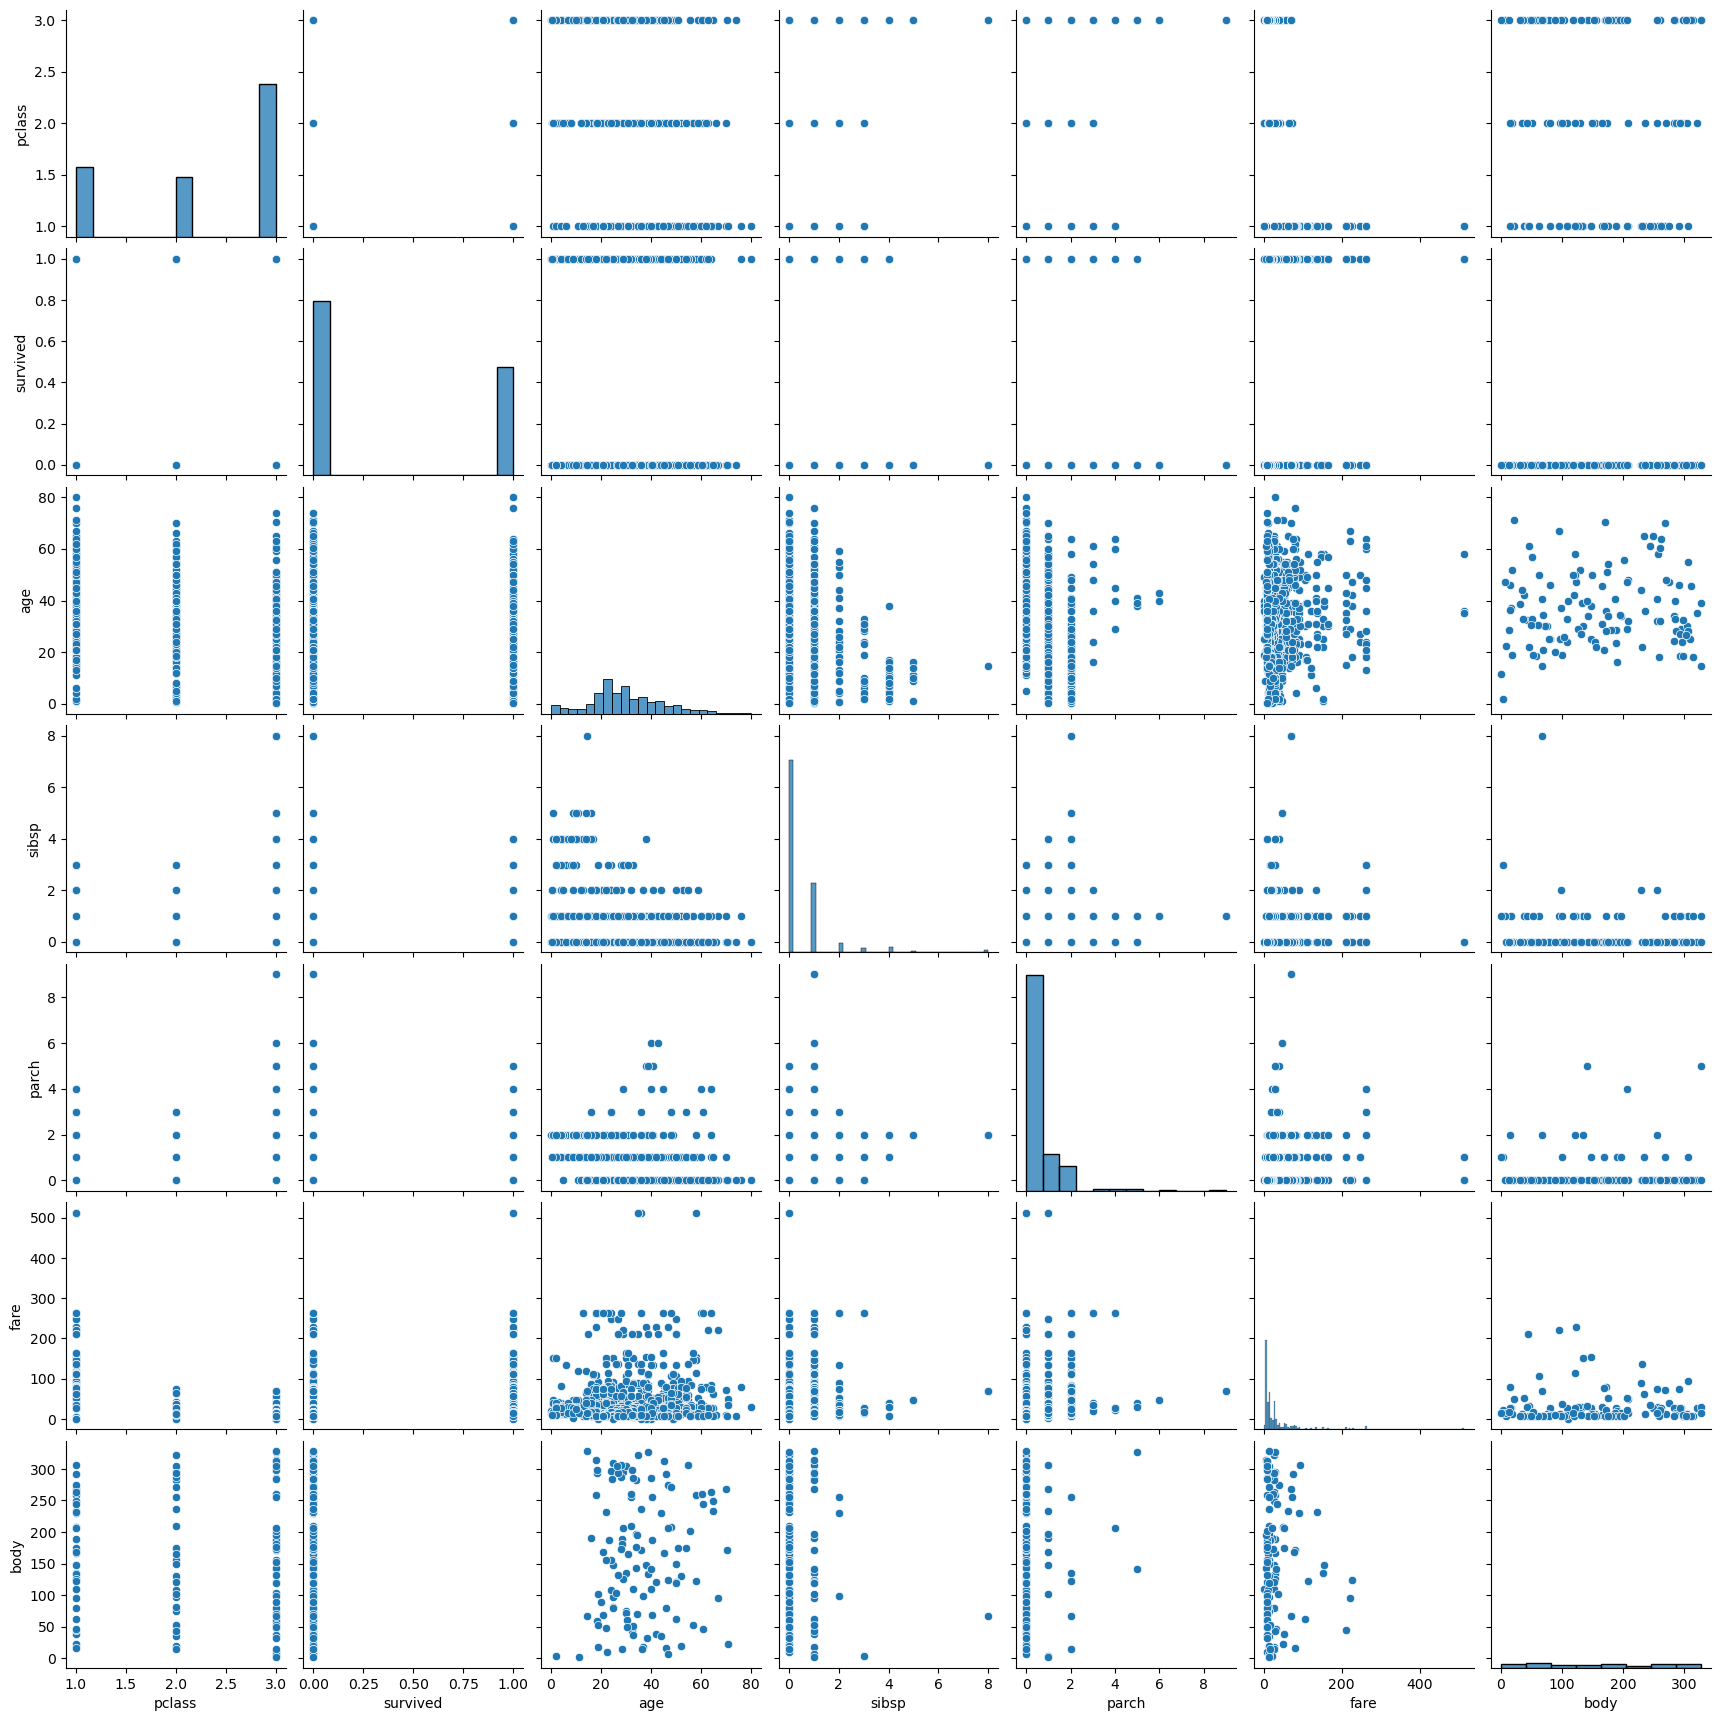

In [69]:
sns.pairplot(dataset)
plt.show()

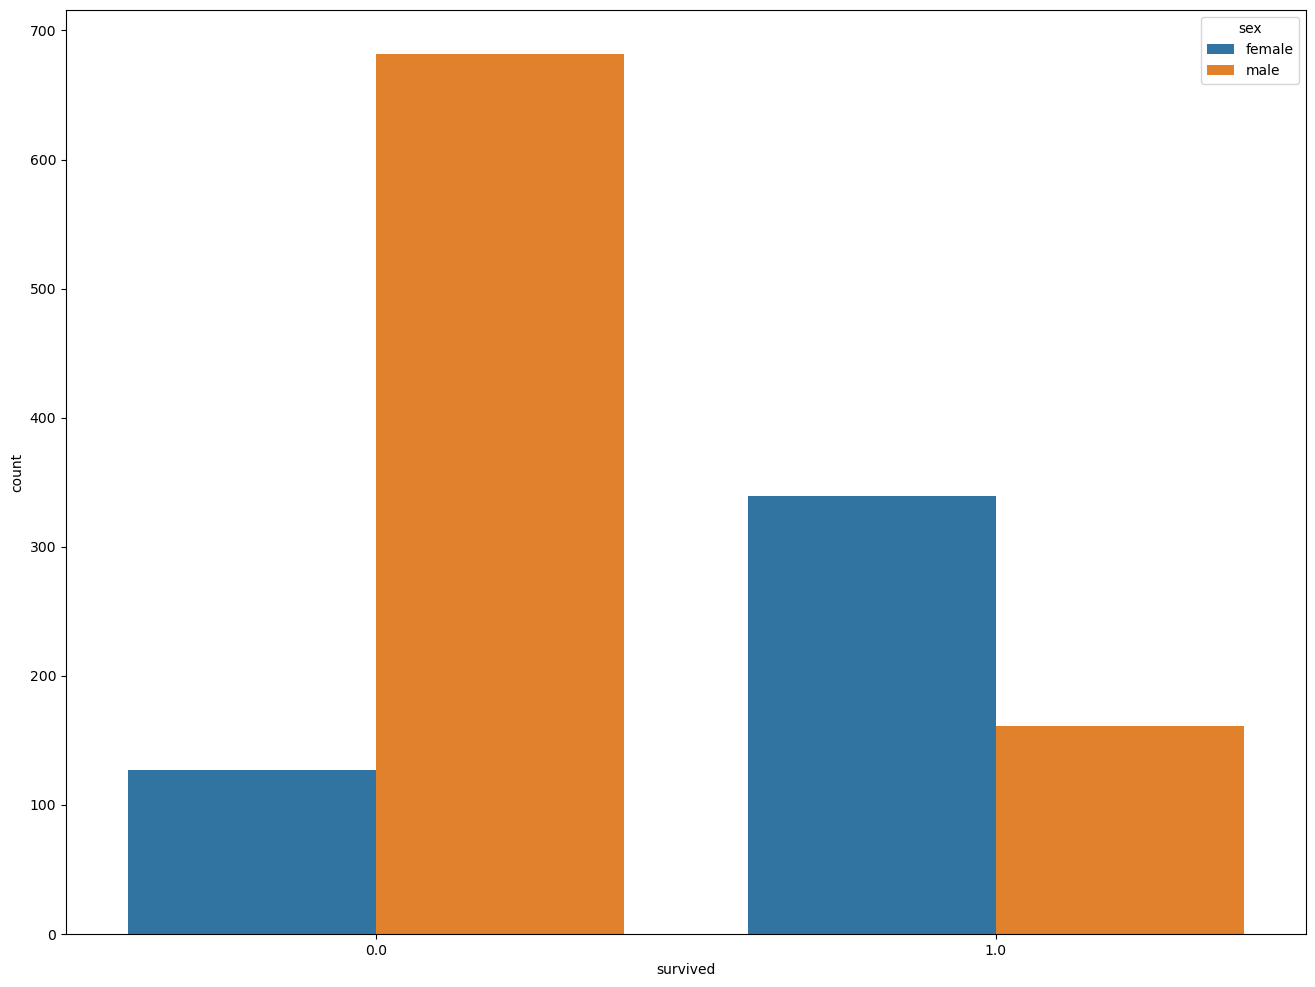

In [70]:
plt.figure(figsize=(16, 12))
sns.countplot(x="survived", hue="sex", data=dataset)
plt.show()

In [71]:
numerical_cols = dataset.select_dtypes(exclude=["object"]).columns
print(numerical_cols)

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'body'], dtype='object')


In [72]:
categorical_cols = dataset.select_dtypes(['object']).columns
print(categorical_cols)

Index(['name', 'sex', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest'], dtype='object')


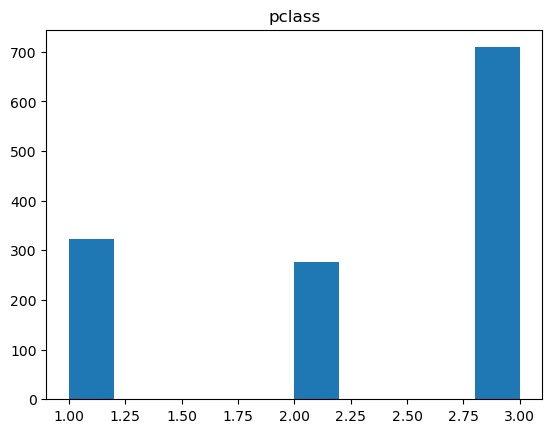

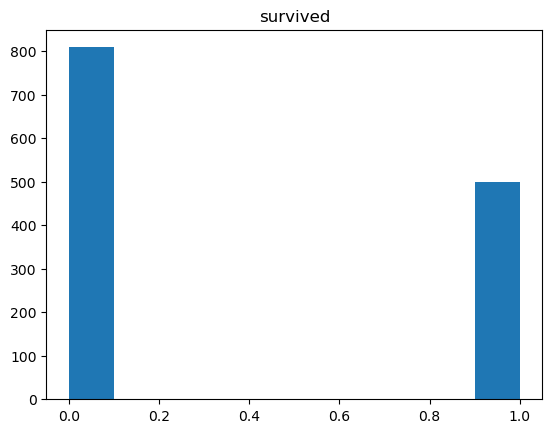

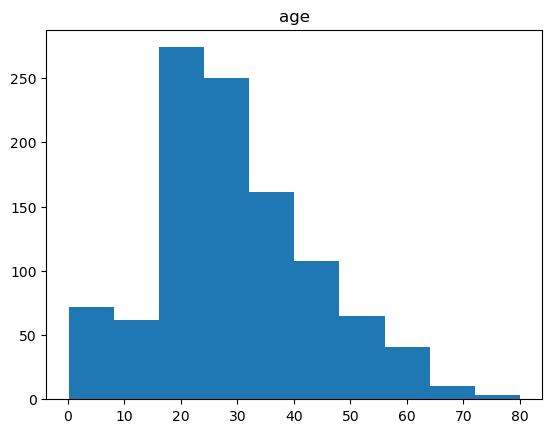

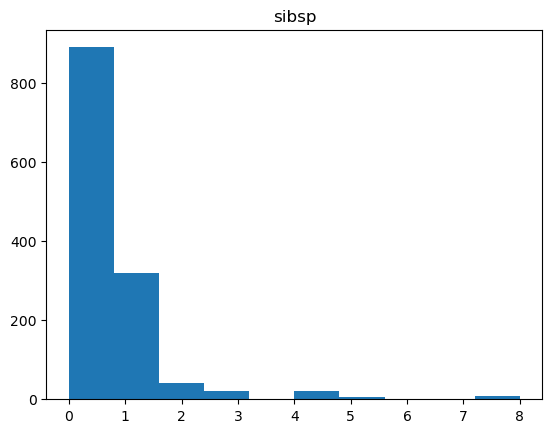

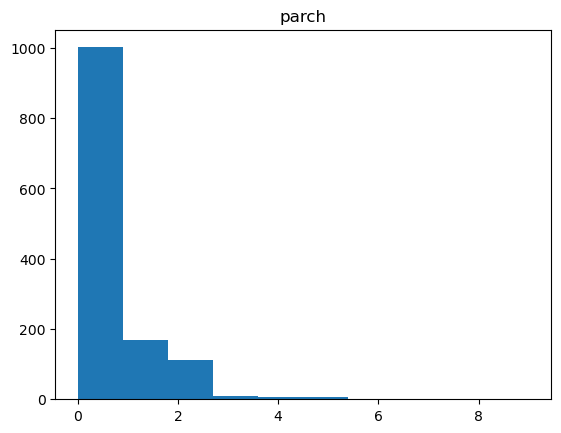

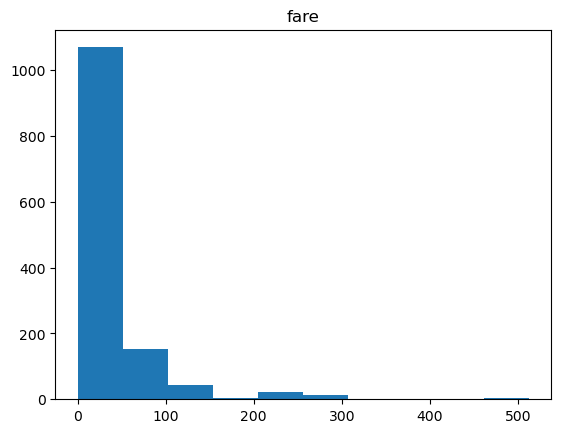

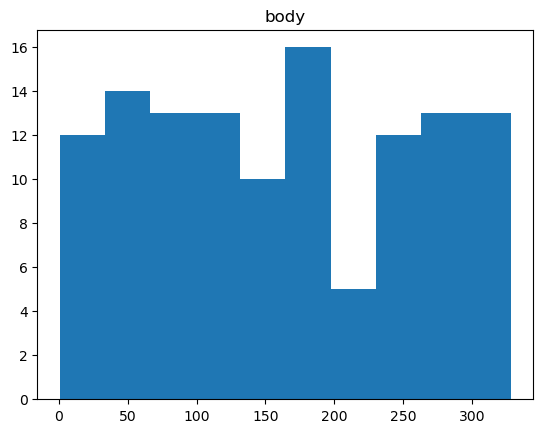

In [73]:
for col in numerical_cols:
    plt.hist(dataset[col])
    plt.title(col)
    plt.show()

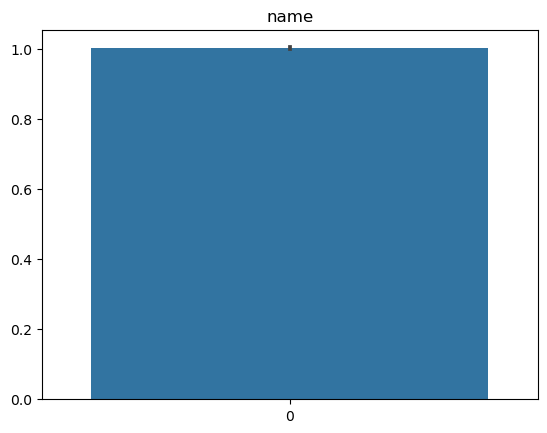

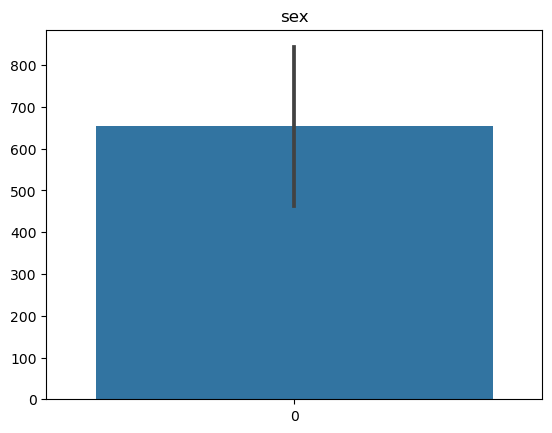

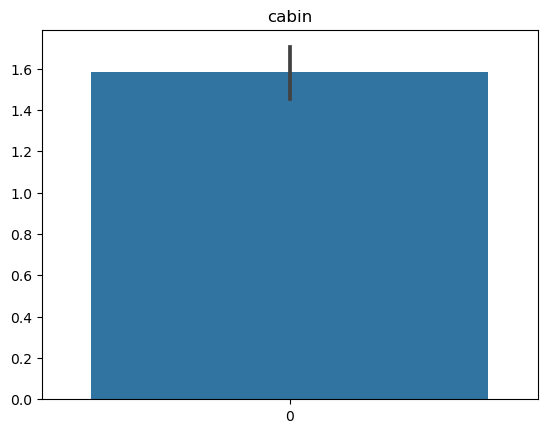

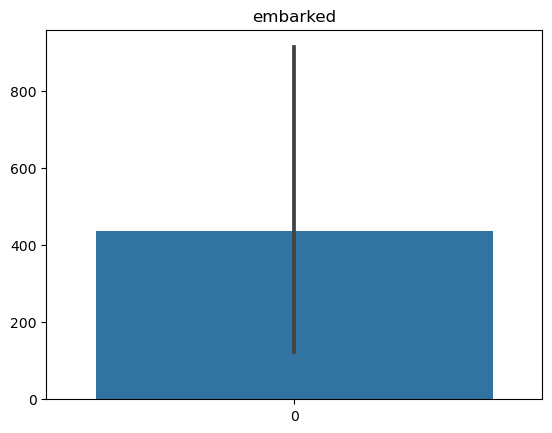

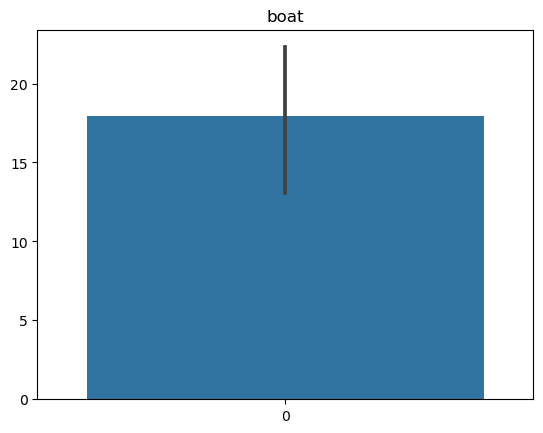

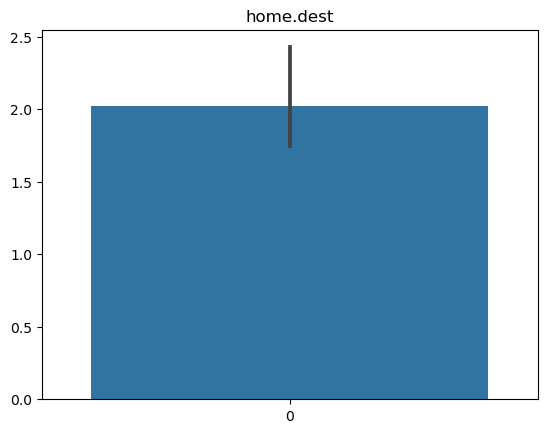

In [137]:
for col in categorical_cols:
    sns.barplot( dataset[col].value_counts()).set_title(col)
    plt.show()

In [77]:
for col in dataset.columns:
    if col != "ticket" and col != "survived":
        print(f"Pivot table for {col} is ")
        print("--------------------------")
        print(pd.pivot_table(dataset, index="survived", columns=col, values="ticket", aggfunc='count'))
        print()
        print()

Pivot table for pclass is 
--------------------------
pclass    1.0  2.0  3.0
survived               
0.0       123  158  528
1.0       200  119  181


Pivot table for name is 
--------------------------
name      Abbing, Mr. Anthony  Abbott, Master. Eugene Joseph  \
survived                                                       
0.0                       1.0                            1.0   
1.0                       NaN                            NaN   

name      Abbott, Mr. Rossmore Edward  Abbott, Mrs. Stanton (Rosa Hunt)  \
survived                                                                  
0.0                               1.0                               NaN   
1.0                               NaN                               1.0   

name      Abelseth, Miss. Karen Marie  Abelseth, Mr. Olaus Jorgensen  \
survived                                                               
0.0                               NaN                            NaN   
1.0                   

In [78]:
nans = dataset.isna().sum().sort_values(ascending=False)
missing_data = pd.concat([nans], axis=1, keys=["Total"])

In [79]:
missing_data

,Total
body,1189
cabin,1015
boat,824
home.dest,565
age,264
embarked,3
fare,2
pclass,1
survived,1
name,1


In [80]:
dataset = dataset.drop(missing_data[missing_data.get("Total") > 177].index, 1)
print(dataset.shape)
dataset.head()

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

In [81]:
print(dataset.shape)
dataset.head()

(1310, 14)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [83]:
X_test = dataset.drop(['name', 'cabin'], axis=1)

In [84]:
print(X_test.shape)
X_test

(1310, 12)


,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest
0,1.0,1.0,female,29.0000,0.0,0.0,24160,211.3375,S,2,NaN,"St Louis, MO"
1,1.0,1.0,male,0.9167,1.0,2.0,113781,151.5500,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,female,2.0000,1.0,2.0,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,male,30.0000,1.0,2.0,113781,151.5500,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,female,25.0000,1.0,2.0,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,female,NaN,1.0,0.0,2665,14.4542,C,NaN,NaN,NaN
1306,3.0,0.0,male,26.5000,0.0,0.0,2656,7.2250,C,NaN,304.0,NaN
1307,3.0,0.0,male,27.0000,0.0,0.0,2670,7.2250,C,NaN,NaN,NaN
1308,3.0,0.0,male,29.0000,0.0,0.0,315082,7.8750,S,NaN,NaN,NaN


In [86]:
dataset = dataset.drop(dataset.loc[dataset.get("embarked").isna()].index)
dataset["age"] = dataset["age"].fillna(dataset["age"].mean())

In [88]:
dataset.isna().sum().max()

1186

In [90]:
categorical_cols = dataset.select_dtypes(["object"]).columns
print(categorical_cols)

Index(['name', 'sex', 'cabin', 'embarked', 'boat', 'home.dest'], dtype='object')


In [92]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')

In [94]:
X = dataset.drop(["survived"], axis=1)

In [95]:
X = ct.fit_transform(X)

In [96]:
X.shape

(1307, 1900)

In [106]:
X_test.shape

(1310, 12)

In [107]:
y = dataset["survived"]

In [108]:
y.shape

(1307,)

In [109]:
X.shape

(1307, 1900)